# Lab 3: Spatial data manipulation: Raster

In this lab, you will analyze the impact of hurricane Harvey, which was happened in August 2017 in Texas. You will find that most of the tasks were covered in the lecture, and it is a reproduction of the tasks. The differences are the study area (Houston instead of Champaign), the index (<a href=https://eos.com/make-an-analysis/ndwi/>NDWI [Normalized Difference Water Index]</a> instead of NDVI [Normalized Difference Vegetation Index]), and the data source (Sentinel 2 instead of Landsat 8). 

## Structure
### 1. Import Data (1 point)
**1.1.** (0.5 point) Import and stack four bands collected on **August 15 2017**. Save the result as a format of `ndarray` and name it as `before_harvey`. <br>
**1.2.** (0.5 point) Import and stack four bands collected on **September 1 2017**. Save the result as a format of `ndarray` and name it as `after_harvey`.
### 2. Display (True / False) Color Images after Harvey (1 point)
**2.1.** (0.5 point) Plot a true color image (R,G,B) after Harvey with `ep.plot_rgb()` method. <br>
**2.2.** (0.5 point) Plot a false color image (NIR,R,G) after Harvey with `ep.plot_rgb()` method. <br>
### 3. Calculate Normalized Difference Water Index (NDWI) "Before" and "After" Harvey (1 point)
**3.1.** (0.5 point) Calculate NDWI **before** harvey and save it as `ndwi_before`. <br>
**3.2.** (0.5 point) Calculate NDWI **after** harvey and save it as `ndwi_after`. <br>
### 4. Classify Raster Image based on the NDWI (1 point)
**4.1.** (0.5 point) Classify the values in `ndwi_before` array with `np.digitize()` method, and save the result as `ndwi_before_class`. <br>
**4.2.** (0.5 point) Classify the values in `ndwi_after` array with `np.digitize()` method, and save the result as `ndwi_after_class`. <br>
### 5. Calculate the area covered by water and its percentage over the entire area (1 point + a)
**5.1.** (0.5 point) Calculate the percentage of area covered by water, **before** Hurricane Harvey, save it as `percent_before_harvey`. <br>
**5.2.** (0.5 point) Calculate the percentage of area covered by water, **after** Hurricane Harvey,  save it as `percent_after_harvey`. <br>
**5.3. (Extra 1 point)** Calculate the size of area (in Square KM) which wasn't covered by water before Harvey but covered by water after Harvey. Save the result as `diff_area` with the numerical format.

## Notes:
**Before you submit your lab, make sure everything runs as expected WITHOUT ANY ERROR.** <br>
**Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`:**

In [1]:
FULL_NAME = ""

In [2]:
# Import necessary packages
import rasterio as rio
import numpy as np
import os
import matplotlib.pyplot as plt
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

data_path = './data'

### 1. Import Data (1 point)

In the data folder, you will find two sets of Senitinel2 satellite imagery. Each set has four JPEG2000 files, and each file represents the bands correspinding to each color/wavelength. Please refer to the table below and import the files to the appropriate band, accordingly. <br>

**Name schema: "Sentinel2_{YYYYMMDD}_B{Band Number}.jp2"**

| Band Number |	Description | Resolution |
| :-: | :-: | :-: | 
| Band 2 | Visible blue | 10 meter |
| Band 3 | Visible green | 10 meter |
| Band 4 | Visible red | 10 meter |
| Band 8 | Near Infrared | 15 meter |

**1.1.** (0.5 point) Import and stack four bands collected on **August 15 2017**. Save the result as a format of `ndarray` and name it as `before_harvey`. <br>
**1.2.** (0.5 point) Import and stack four bands collected on **September 1 2017**. Save the result as a format of `ndarray` and name it as `after_harvey`.

In [3]:
# Your code here (Task 1.1)
temp_list = [] # Empty list for storing Numpy array

for i in [2, 3, 4, 8]: # Blue, Green, Red, Near-infrared
    temp_path = os.path.join(data_path, f'Sentinel2_20170815_B{i}.jp2') # Image path
    temp_band = rio.open(temp_path) # Import image into rasterio package
    temp_list.append(temp_band.read(1)) # Convert image to Numpy array and append it to the empty list

before_harvey = np.stack(temp_list)

In [4]:
# Your code here (Task 1.2)
temp_list = [] # Empty list for storing Numpy array

for i in [2, 3, 4, 8]: # Blue, Green, Red, Near-infrared
    temp_path = os.path.join(data_path, f'Sentinel2_20170901_B{i}.jp2') # Image path
    temp_band = rio.open(temp_path) # Import image into rasterio package
    temp_list.append(temp_band.read(1)) # Convert image to Numpy array and append it to the empty list

after_harvey = np.stack(temp_list)

In [5]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""

assert type(before_harvey) == np.ndarray
assert type(after_harvey) == np.ndarray

assert before_harvey.shape == (4, 1254, 2328) # (Bands, Rows, Columns)
assert after_harvey.shape == (4, 1254, 2328) # (Bands, Rows, Columns)

print('Success!')

Success!


### 2. Display (True / False) Color Images after Harvey (1 point)

**2.1.** (0.5 point) Plot a true color image (R,G,B) after Harvey with `ep.plot_rgb()` method. <br>
**2.2.** (0.5 point) Plot a false color image (NIR,R,G) after Harvey with `ep.plot_rgb()` method. <br>

**You are expected to see the two images below. But it doesn't have to be executed in one cell.**
![True and False Color representation of Satellite image](./data/task2_example.png)


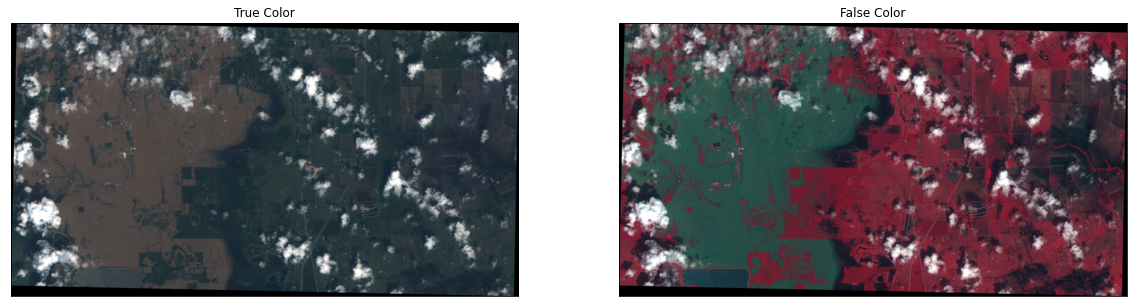

In [6]:
# Your code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ep.plot_rgb(after_harvey, 
            ax=ax1,
            rgb=(2,1,0), # Indices of the three bands to be plotted.
            str_clip=0.5, # (Optional) The percentage of clip to apply to the stretch.
            figsize =(10,10), # The x and y integer dimensions of the output plot.
            stretch=True, # (Optional) If set to True, a linear stretch will be applied.
            title='True Color'
           )

ep.plot_rgb(after_harvey, 
            ax=ax2,
            rgb=(3,2,1), # Indices of the three bands to be plotted.
            str_clip=0.5, # (Optional) The percentage of clip to apply to the stretch.
            figsize =(10,10), # The x and y integer dimensions of the output plot.
            stretch=True, # (Optional) If set to True, a linear stretch will be applied.
            title='False Color'
           )
plt.show()

### 3. Calculate Normalized Difference Water Index (NDWI) "Before" and "After" Harvey (1 point)

Use the equation below with NumPy and calculate NDWI for each period. The index represents the water body level on the surface against soil and vegitation. 

\begin{gather*}
NDWI = \frac{Green - NIR}{Green + NIR}
\end{gather*}

**Note**: Use the `normalize` function below to normalize values in each band. 

**3.1.** (0.5 point) Calculate NDWI **before** harvey and save it as `ndwi_before`. <br>
**3.2.** (0.5 point) Calculate NDWI **after** harvey and save it as `ndwi_after`. <br>

In [7]:
def normalize(array):
    '''
    normalize: normalize a numpy array so all value are between 0 and 1
    '''
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [8]:
# Your code here (Before Harvey)
before_green = before_harvey[1]
before_nir = before_harvey[3]

before_green_norm = normalize(before_green)
before_nir_norm = normalize(before_nir)

ndwi_before = (before_green_norm - before_nir_norm) / (before_green_norm + before_nir_norm)

<ipython-input-8-10d77ddcb546>:8: RuntimeWarning: invalid value encountered in true_divide
  ndwi_before = (before_green_norm - before_nir_norm) / (before_green_norm + before_nir_norm)


In [9]:
# Your code here (After Harvey)
after_green = after_harvey[1]
after_nir = after_harvey[3]

after_green_norm = normalize(after_green)
after_nir_norm = normalize(after_nir)

ndwi_after = (after_green_norm - after_nir_norm) / (after_green_norm + after_nir_norm)

<ipython-input-9-9ab06184d647>:8: RuntimeWarning: invalid value encountered in true_divide
  ndwi_after = (after_green_norm - after_nir_norm) / (after_green_norm + after_nir_norm)


**Check Your Result Here** You should see the images below if you write the code properly. 

![](./data/task3_example.png)

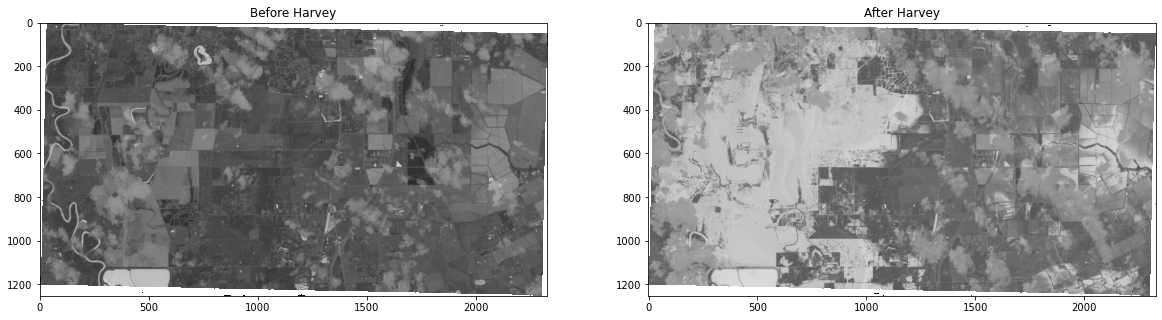

In [10]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax1.imshow(ndwi_before, cmap='Greys_r')
ax2.imshow(ndwi_after, cmap='Greys_r')
ax1.set_title('Before Harvey')
ax2.set_title('After Harvey')

plt.show()

### 4. Classify Raster Image based on the NDWI (1 point)

Now, you will classify the imagery of two periods (before and after Harvey) to examine the impact of flooding. Based on the table below, I provided `bounds`, `ndwi_colors`, `ndwi_cmap`, and `ndwi_names`. These values will help you to plot the classification result in the last cell of this section. 

| NDWI Range | Meaning |
| :-: | :-: |
| 0.2 ~ 1 | Water surface |
| 0.0 ~ 0,2  | Flooding|
| -0.3 ~ 0.0 | Moderate drought |
| -1 ~ -0.3 | Drought |

**4.1.** (0.5 point) Classify the values in `ndwi_before` array with `np.digitize()` method, and save the result as `ndwi_before_class`. <br>
**4.2.** (0.5 point) Classify the values in `ndwi_after` array with `np.digitize()` method, and save the result as `ndwi_after_class`. <br>
**Note**: Be aware that you need to remove `nan` value in each array with `np.nan_to_num()` method. Convert `nan` to `-1` for our example here. 

In [11]:
# Run this cell before running your code.
bounds = np.array([-2, -0.3, 0, 0.2, 2]) # Define boundary
ndwi_colors = ["grey", "lightblue", "blue", "darkblue"]  # Define color map
ndwi_cmap = ListedColormap(ndwi_colors)  # Define color map
ndwi_names = ["Drought", "Moderate drought", "Flooding", "Water Surface"] # Define class names

In [12]:
# Your code here
ndwi_before = np.nan_to_num(ndwi_before, nan=-1)
ndwi_before_class = np.digitize(ndwi_before, bounds)

ndwi_after = np.nan_to_num(ndwi_after, nan=-1)
ndwi_after_class = np.digitize(ndwi_after, bounds)

**Check Your Result Here** You should see the images below if you write the code properly. 

![](./data/task4_example.png)

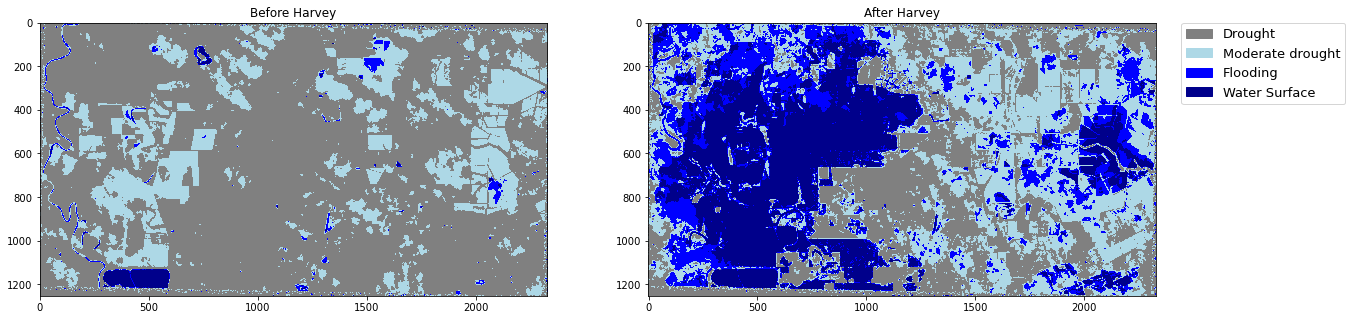

In [13]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

newi_ax1 = ax1.imshow(ndwi_before_class, cmap=ndwi_cmap)
newi_ax2 = ax2.imshow(ndwi_after_class, cmap=ndwi_cmap)
ep.draw_legend(im_ax=newi_ax2, classes=np.unique(ndwi_after_class), titles=ndwi_names)
ax1.set_title('Before Harvey')
ax2.set_title('After Harvey')

plt.show()

### 5. Calculate the area covered by water and its percentage over the entire area (1 point + a)

**5.1.** (0.5 point) Calculate the percentage of area covered by water, **before** Hurricane Harvey, save it as `percent_before_harvey`. <br>
**5.2.** (0.5 point) Calculate the percentage of area covered by water, **after** Hurricane Harvey,  save it as `percent_after_harvey`. 

**5.3. (Extra 1 point)** Calculate the size of area (in Square KM) which wasn't covered by water before Harvey but covered by water after Harvey. Save the result as `diff_area` with the numerical format. <br>
**Note:** the cell size (resolution) of Sentinel2 is 10 meters. 

In [14]:
# Your code here
count_before_harvey = ndwi_before_class > 2 # Class 3 (Flooding) and 4 (Water Surface)
water_before_harvey = count_before_harvey.sum() # Count the number of True in the array
percent_before_harvey = water_before_harvey / (before_harvey.shape[1] * before_harvey.shape[2])

count_after_harvey = ndwi_after_class > 2 # Class 3 (Flooding) and 4 (Water Surface)
water_after_harvey = count_after_harvey.sum() # Count the number of True in the array
percent_after_harvey = water_after_harvey / (after_harvey.shape[1] * after_harvey.shape[2])

# Your code here (Extra Point)
diff_water_count = water_after_harvey - water_before_harvey
diff_area = diff_water_count * 10 * 10 / (1000 * 1000) # Cell Count * 10 m * 10 m (SqMeter) -> covert it to SqKm

In [16]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""

assert round(percent_before_harvey, 2) == 0.03
assert round(percent_after_harvey, 2) == 0.41

print('Success!')

Success!


In [17]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""

assert round(diff_area) == 111 or round(diff_area) == 112

print('Congraculations! You earned extra point!')

Congraculations! You earned extra point!


### *You have finished Lab 3: Spatial data manipulation: Raster*
Please name your jupyter notebook as `GEOG489_Lab3_[YOUR_NET_ID].ipynb`, and upload it to https://learn.illinois.edu. 